In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitudes as pairs by zipping them
lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Unzip the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.143567441614785 112.060117675605
-45.79266310752296 -151.1062290106123
3.4705394412684996 -145.30992490999682
-4.940764221995053 -70.2523846092907
83.19704479643246 160.60243428128598
-12.664160219576232 -75.9864261082349
-10.505462674017252 -6.937710078221386
28.632690807212214 -111.17616438926193
36.89210555586021 -92.267927349808
53.13744230898254 -9.67408247489277
86.01787281676431 -116.0770940020701
-10.1700212856328 -145.8344866816047
25.19558210061284 113.57734666318618
-70.79866178970755 25.642339416680926
-13.488049147174408 -70.11260918000193
19.215127050145227 -69.00247635970129
22.288086054576056 77.69633732036203
43.743008340505895 -125.68804506026191
-23.445479665942386 135.53335455886526
-42.95026254093313 -173.47336851930524
15.667801084000175 38.565783589346296
37.8018866467641 135.32383639585515
-16.117053902462402 -105.28022521908336
87.4296527884583 -10.34218871324876
-6.749269753892392 -7.31176445870878
-89.84858759230126 -143.40883571693334
60.851146892304655 

-16.895317237475254 -137.067138468051
56.43909946112561 119.95684990336491
55.44684669495686 -36.40740975873064
-46.10207527954258 -159.29493593121973
31.244250921622807 -157.9420562883288
-0.5786406820991061 -66.92521251933596
-88.87382036832302 87.90994900420293
22.705998981118668 -65.09182980509784
-51.02012709838139 -34.40923936493883
62.781169511858565 159.61005899290325
-54.27348805634038 177.69948264993013
9.075429238918588 128.4278284252183
-88.93569939468786 -77.22222938702811
79.20686972774834 146.52778509647453
-86.8250743839181 -12.779143599878608
41.87204246069538 51.901421800967
53.9577161435021 -158.1227025142407
-38.86969691369991 -79.7399844421715
72.26263204862582 -102.86808172314439
-52.285421303444274 171.5919924793186
-24.16554409773778 -161.8656248363478
-81.64909008728108 -76.53811154193858
-1.8858034719631007 169.16395758105966
-30.252262146087325 113.25403724056133
-26.090760264911843 33.588745674050756
58.762873886044815 139.73322080741883
68.80852761055692 -1

-70.43594896774884 164.1002494771468
-40.325622780036014 -26.04606001159638
51.472160010858886 108.01358269546353
-1.9598096325400576 -84.263923286894
-28.37297891750614 44.41753691611882
55.462279381522876 82.85483792331809
-76.86038051133049 136.35763761146558
2.778115623194793 -146.4630521914021
-88.85732348656036 -129.86471015671992
-59.96499943110804 131.5371907580947
39.718938288627015 121.85264335834114
-74.00376406127955 41.07013480569648
-77.54435306726819 -25.792686825305225
65.44285558888899 163.7707259081675
-35.25082910972695 -9.344686909862105
-64.30290184755353 -132.8123752855528
-82.17925128835786 47.04098370825889
34.69641935491455 43.60433984080666
19.030278537883248 -110.28478796200791
14.645626679341063 -9.107997433671528
30.357568041801485 101.33331882074185
7.493436798707748 -68.116919115538


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

632

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
  
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | benjamin constant
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | quilmana
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | providencia
Processing Record 9 of Set 1 | west plains
Processing Record 10 of Set 1 | kilrush
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | shaoguan
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | macusani
Processing Record 15 of Set 1 | samana
Processing Record 16 of Set 1 | seoni malwa
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | asmara
Processing Record 21 of Set 1 | wajima
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Se

Processing Record 42 of Set 4 | birin
Processing Record 43 of Set 4 | atasu
Processing Record 44 of Set 4 | comodoro rivadavia
Processing Record 45 of Set 4 | beni mazar
Processing Record 46 of Set 4 | maldonado
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | kloulklubed
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | noumea
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | erzin
Processing Record 4 of Set 5 | halalo
City not found. Skipping...
Processing Record 5 of Set 5 | north battleford
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | shelburne
Processing Record 9 of Set 5 | miguel hidalgo
Processing Record 10 of Set 5 | ondjiva
Processing Record 11 of Set 5 | andenes
Processing Record 12 of Set 5 | ancud
Processing Record 13 of Set 5 | sagarejo
Processing Record 14 of Set 5 | wad madani
Processing Record 15 of Se

Processing Record 27 of Set 8 | kodinsk
Processing Record 28 of Set 8 | jumla
Processing Record 29 of Set 8 | jos
Processing Record 30 of Set 8 | brigantine
Processing Record 31 of Set 8 | burica
City not found. Skipping...
Processing Record 32 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | lavrentiya
Processing Record 35 of Set 8 | naron
Processing Record 36 of Set 8 | kyshtovka
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | sfantu gheorghe
Processing Record 39 of Set 8 | bembibre
Processing Record 40 of Set 8 | tiznit
Processing Record 41 of Set 8 | acarau
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | maumere
Processing Record 44 of Set 8 | poum
Processing Record 45 of Set 8 | tuy hoa
Processing Record 46 of Set 8 | mineros
Processing Record 47 of Set 8 | novyy urengoy
Processing Record 48 of Set 8 | nyirbogat
Processing Record 49 of Set 8 | kalmunai
Processing Rec

Processing Record 18 of Set 12 | bambanglipuro
Processing Record 19 of Set 12 | madina
Processing Record 20 of Set 12 | kismayo
Processing Record 21 of Set 12 | trinidad
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | srednekolymsk
Processing Record 24 of Set 12 | kingsville
Processing Record 25 of Set 12 | sioux lookout
Processing Record 26 of Set 12 | mbandaka
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | roros
Processing Record 30 of Set 12 | askiz
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | acajutla
Processing Record 33 of Set 12 | truth or consequences
Processing Record 34 of Set 12 | auki
Processing Record 35 of Set 12 | quibdo
Processing Record 36 of Set 12 | bagdarin
Processing Record 37 of Set 12 | mahdasht
Processing Record 38 of Set 12 | pulsano
Processing Record 39 of Set 12 | manzanillo
Processing Record 40 of Set 12 | peniche
Processing R

In [16]:
len(city_data)

587

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,58.37,94,100,1.68,US,2022-10-24 23:25:01
1,Mataura,-46.1927,168.8643,52.48,38,1,4.00,NZ,2022-10-24 23:28:53
2,Atuona,-9.8000,-139.0333,76.93,67,0,16.51,PF,2022-10-24 23:28:55
3,Benjamin Constant,-4.3831,-70.0311,80.73,83,40,4.61,BR,2022-10-24 23:34:08
4,Cherskiy,68.7500,161.3000,1.15,90,51,9.89,RU,2022-10-24 23:30:12
5,Quilmana,-12.9500,-76.3833,64.13,79,70,4.41,PE,2022-10-24 23:34:09
6,Jamestown,42.0970,-79.2353,61.02,78,10,1.01,US,2022-10-24 23:25:34
7,Providencia,28.7167,-111.5833,82.20,38,14,18.19,MX,2022-10-24 23:34:10
8,West Plains,36.7281,-91.8524,72.66,66,40,13.80,US,2022-10-24 23:32:59
9,Kilrush,52.6397,-9.4833,49.75,93,83,8.01,IE,2022-10-24 23:34:10


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-10-24 23:25:01,42.6001,-73.9662,58.37,94,100,1.68
1,Mataura,NZ,2022-10-24 23:28:53,-46.1927,168.8643,52.48,38,1,4.00
2,Atuona,PF,2022-10-24 23:28:55,-9.8000,-139.0333,76.93,67,0,16.51
3,Benjamin Constant,BR,2022-10-24 23:34:08,-4.3831,-70.0311,80.73,83,40,4.61
4,Cherskiy,RU,2022-10-24 23:30:12,68.7500,161.3000,1.15,90,51,9.89


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1666655426.711505

In [18]:
today = time.strftime("%x")
today

'10/24/22'

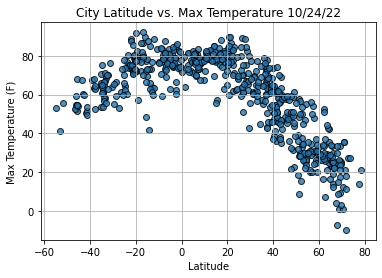

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

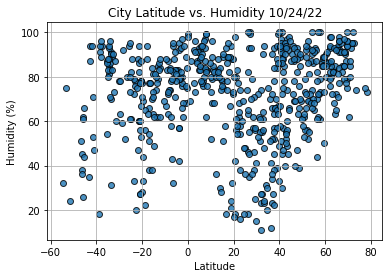

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

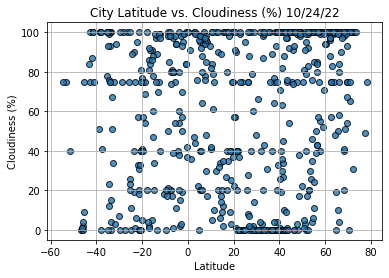

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

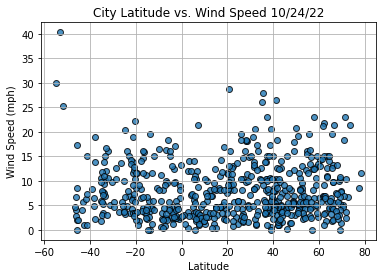

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()